# LASSO and Generalisation Robustness

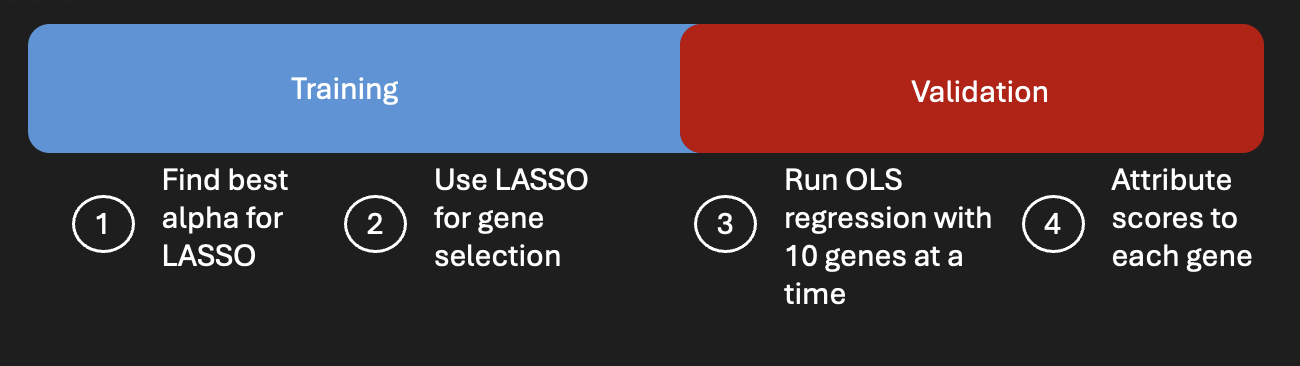

In [1]:
import pandas as pd
pd.set_option('display.max_colwidth', None)
import os
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 16})
import numpy as np
plt.style.use('dark_background')
ROOT =  "../.."

This project received funding from the European Union’s Horizon 2020 research and innovation programme [952914] (FindingPheno).

In [ ]:
df = pd.read_csv(ROOT + os.sep + "data/processed/all_chromosomes.csv", index_col=0)
X = df.pivot_table(index='sample.id', columns='gene', values=["gene.expression"],  aggfunc='mean')
y = df.pivot_table(index='sample.id', values=["gutted.weight.kg"],  aggfunc='mean')
gene_annotations = pd.read_csv("../../data/processed/salmon_GO_annotations.tsv", sep="\t")

In [ ]:
X.head()

In [ ]:
all_x_vals = np.array(X.values).flatten()
plt.hist(all_x_vals, bins=100, color='lawngreen', edgecolor='black')
plt.xlabel("Relative gene expression levels")
plt.ylabel("Frequency")

In [ ]:
example_genes = ["1433b", "143b2", "143g1", "2a5e"]
gene_annotations[gene_annotations["SYMBOL"].isin(example_genes)][["SYMBOL", "GENENAME"]]

In [ ]:
y.head()

In [ ]:
plt.hist(y, bins=int(np.sqrt(len(y))), color='lawngreen', edgecolor='black')
plt.xlabel("Gutted weight (kg)")
plt.ylabel("Frequency")

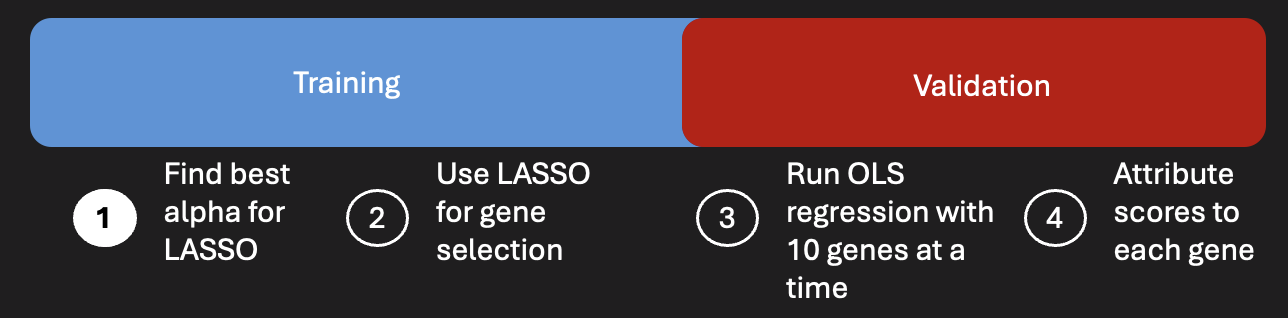

In [ ]:
!python step1_select_best_alpha_for_lasso.py

In [ ]:
results_step_1 = pd.read_csv(ROOT + os.sep + "data/alpha_mae_altpheno_0_df_1.csv", index_col=0)
results_step_1
plt.scatter(x=results_step_1["alphas"], y=results_step_1["mae_list"], color="lawngreen")
plt.xlabel("Alpha")
plt.ylabel("Mean Absolute Error")

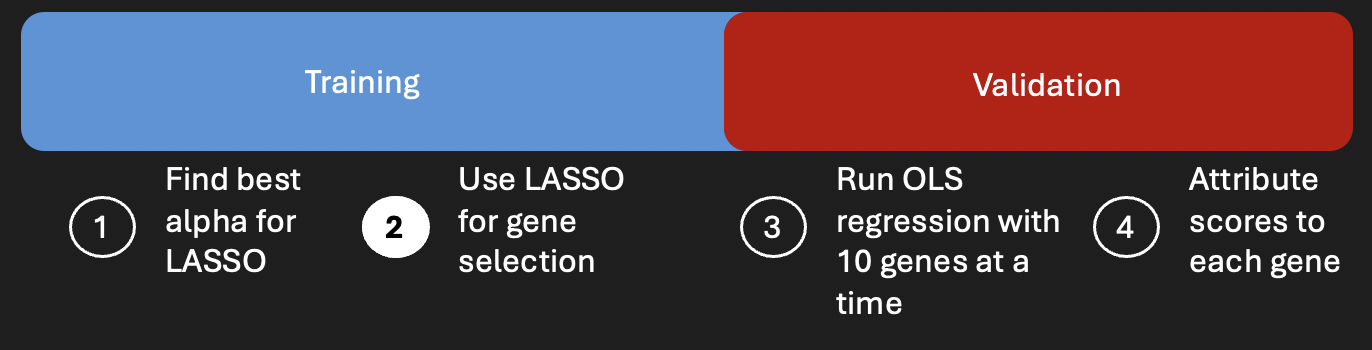

In [ ]:
!python step2_lasso_feature_selection.py

In [ ]:
remaining_features = pd.read_csv(ROOT + os.sep + f"data/best_features_altpheno_0_1.csv", index_col=0)
remaining_features

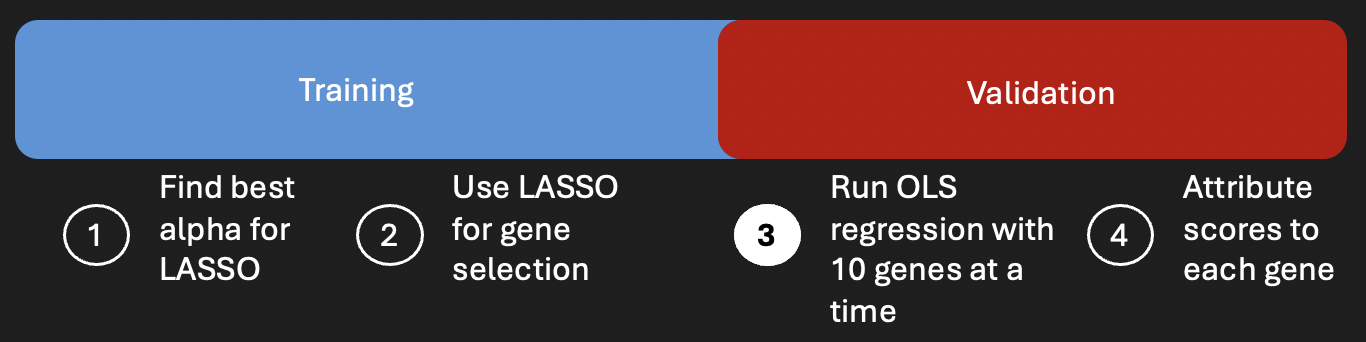

In [ ]:
!python step3_robustness_feature_selection.py

In [ ]:
result_df = pd.read_csv(ROOT + os.sep + "data/result_sorted_0_1.csv", index_col= 0)
result_df

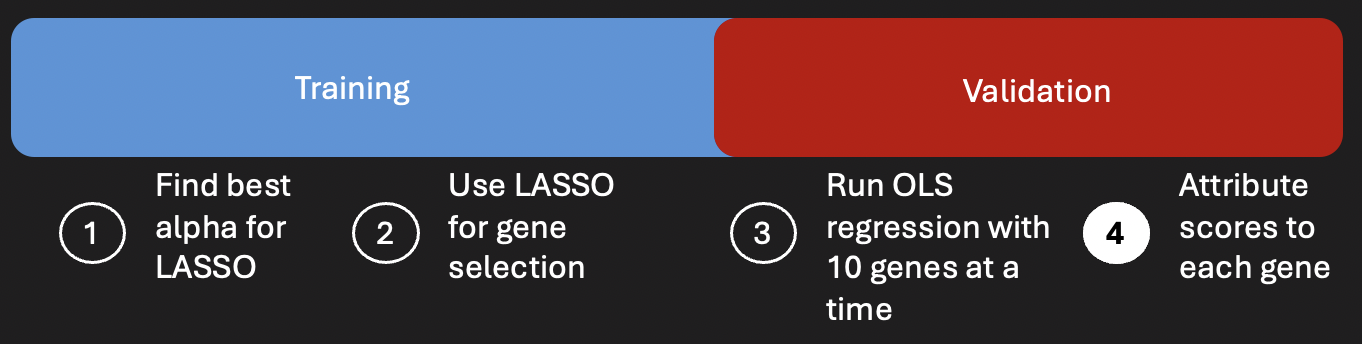

In [ ]:
!python step4_aggregate_MAEs.py

In [ ]:
result_df = pd.read_csv(ROOT + os.sep + f'data/results_ave_mae_1.csv', index_col=0)
result_df.sort_values(by='ave_MAE', inplace=True)
result_df.reset_index(drop=True, inplace=True)
result_df.head(10)

In [ ]:
plt.scatter(y = result_df['ave_MAE'], x = result_df.index, color='lawngreen', edgecolor='black')
plt.axvline(x=10, color='white', linestyle='--')
plt.ylabel('Average Attributed MAE')
plt.xlabel('Genes ordered by AAMAE')

In [ ]:
top_10_list = list(result_df.head(10)["Gene"])
top_10_names = gene_annotations[gene_annotations["SYMBOL"].isin(top_10_list)][["SYMBOL", "GENENAME"]].drop_duplicates()
top_10_names

In [ ]:
x1 = X["gene.expression"][top_10_list[0]]
x2 = X["gene.expression"][top_10_list[1]]
x3 = X["gene.expression"][top_10_list[2]]
x4 = X["gene.expression"][top_10_list[3]]

# Create subplots
fig, axes = plt.subplots(1, 4, figsize=(20, 5))

# Plot each scatter plot
axes[0].scatter(x1, y, color ='lawngreen')
axes[0].set_title(top_10_list[0])
axes[1].scatter(x2, y, color ='lawngreen')
axes[1].set_title(top_10_list[1])
axes[2].scatter(x3, y, color ='lawngreen')
axes[2].set_title(top_10_list[2])
axes[3].scatter(x4, y, color ='lawngreen')
axes[3].set_title(top_10_list[3])

# Plot lines of best fit
coefficients = np.polyfit(x1, y, 1)
y_line = np.polyval(coefficients, x1)
axes[0].plot(x1, y_line, color='red')

coefficients = np.polyfit(x2, y, 1)
y_line = np.polyval(coefficients, x2)
axes[1].plot(x2, y_line, color='red')

coefficients = np.polyfit(x3, y, 1)
y_line = np.polyval(coefficients, x3)
axes[2].plot(x3, y_line, color='red')

coefficients = np.polyfit(x4, y, 1)
y_line = np.polyval(coefficients, x4)
axes[3].plot(x4, y_line, color='red')

fig.text(0.5, -0.01, 'Relative gene expression level', ha='center', va='center')
fig.text(-0.01, 0.5, 'Gutted weight (kg)', ha='center', va='center', rotation='vertical')

# set axes limits
for i in range(4):
    axes[i].set_xlim(5, 16)
    axes[i].set_ylim(0, 8)


# Adjust layout
plt.tight_layout()

# Show plot
plt.show()